In [28]:
# Link: https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly/
# Import
import pandas as pd
import numpy as np
# Making an array to keep data in
pd.Series([1, 90, 'hey', np.nan], index=['a', 'B', 'C', 'd'])

a      1
B     90
C    hey
d    NaN
dtype: object

In [26]:
# Creating a dataframe and storing info in it
pd.DataFrame({'day': [17, 30], 'month': [1, 12], 'year': [2010, 2017]})

,day,month,year
0,17,1,2010
1,30,12,2017


In [29]:
df1 = pd.DataFrame({'a': [1]})
df2 = pd.DataFrame({'b': [2]})

# 1) Incorrect: Raises AttributeError since concat is not in the DataFrame namespace
#df3 = df1.concat(df2) 

# 2) Correct
df4 = pd.concat([df1, df2]) 

# 3) Correct, and equivalent to 2)
df1.append(df2)       

# 4) Incorrect: append does not accept the 'axis' arg. Should use pd.concat with axis='columns'
#df2.append(df2, axis='columns') 

,a,b
0,1.0,NaN
0,NaN,2.0


In [30]:
# Making a directory with data
towns_dic = {
    'name': ['Southampton', 'Cherbourg', 'Queenstown', 'Montevideo'],
    'country': ['United Kingdom', 'France', 'United Kingdom', 'Uruguay'],
    'population': [236900, 37121, 12347, 1305000],
    'age': [np.random.randint(500, 1000) for _ in range(4)]
}
# Making the directory a dataframe
towns_df = pd.DataFrame(towns_dic)
print (towns_df)

   age         country         name  population
0  562  United Kingdom  Southampton      236900
1  986          France    Cherbourg       37121
2  505  United Kingdom   Queenstown       12347
3  520         Uruguay   Montevideo     1305000


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit

# Load dataset
titanic = sns.load_dataset('titanic')

titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [10]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


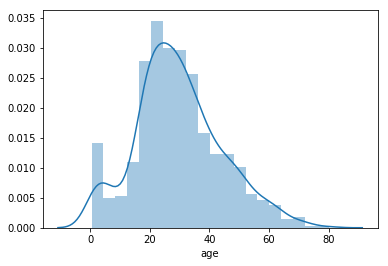

In [11]:
# Age graph in seaborn
sns.distplot(titanic.age.dropna())
plt.show()

In [4]:
## Some experiment to understand dropna()
# titanic = titanic.dropna()
# titanic.info()

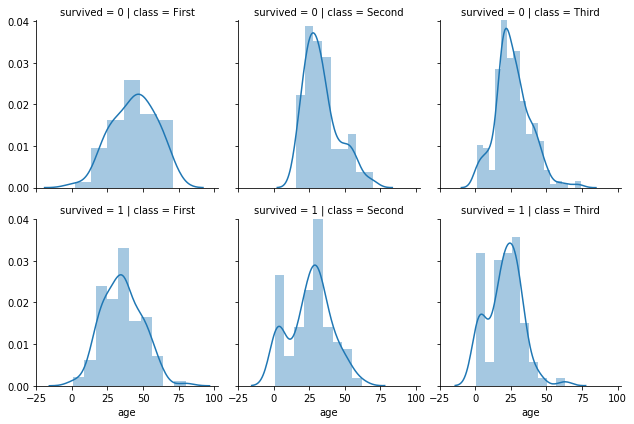

In [5]:
# Breaking down big plts (like the one above) into smaller plots that indicate specific data
g = sns.FacetGrid(titanic, row='survived', col='class')
g.map(sns.distplot, "age")
plt.show()

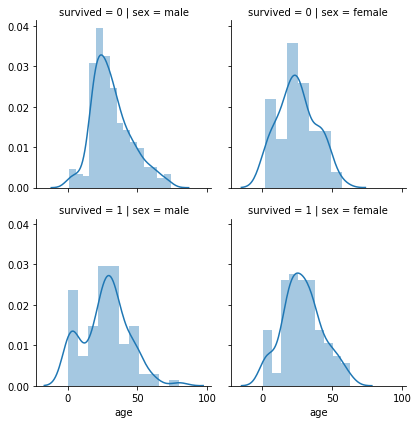

In [9]:
# Breaking down big plts (like the one above) into smaller plots that indicate specific data
g = sns.FacetGrid(titanic, row='survived', col='sex')
g.map(sns.distplot, "age")
plt.show()

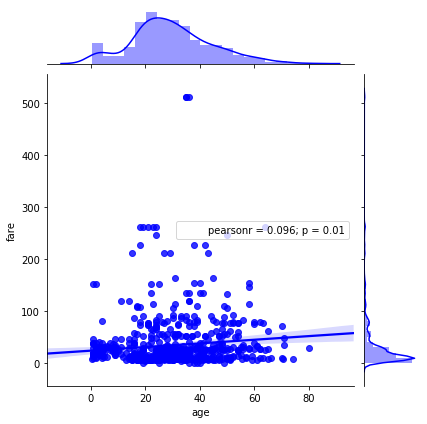

In [39]:
# two plots in one that represent two different variables
sns.jointplot(data=titanic, x='age', y='fare', kind='reg', color='b')
plt.show()

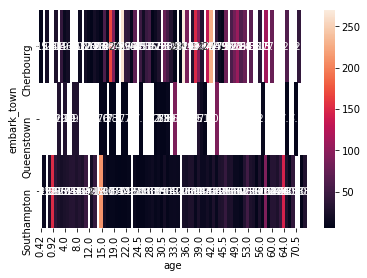

In [6]:
# Heat map in seaborn
df = titanic.pivot_table(index='embark_town', columns='age', values='fare', aggfunc=np.median)
sns.heatmap(df, annot=True, fmt=".1f")
plt.show()

In [8]:
titanic.shape

(891, 15)

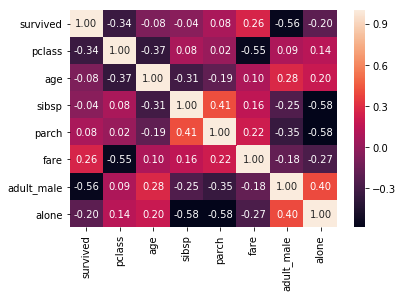

In [42]:
# heat map of all the data
sns.heatmap(titanic.corr(), annot=True, fmt=".2f")
plt.show()

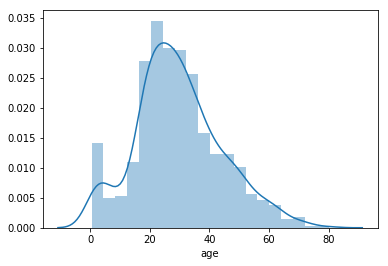

In [11]:
sns.distplot(titanic.age.dropna())
plt.show()

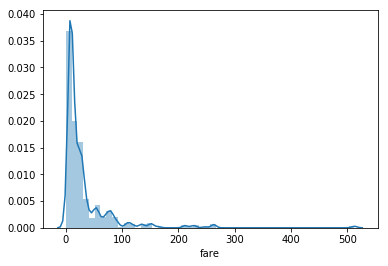

In [12]:
sns.distplot(titanic.fare.dropna())
plt.show()

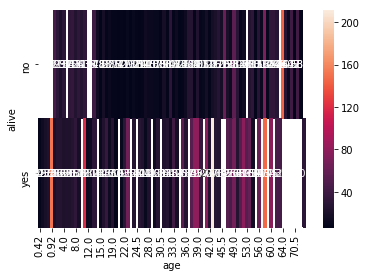

In [55]:
# Heat map in seaborn
df = titanic.pivot_table(index='alive', columns='age', values='fare', aggfunc=np.median)
sns.heatmap(df, annot=True, fmt=".1f")
plt.show()